# **1. Defining the Question**

# Specifying the question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below. A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training). You have two possible approaches (as shown below) given the datasets that will be provided.

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

# Approach 1: Polynomial approach

What to train given:

Rank of home team

*   Rank of home team
*   Rank of away team
*   Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

# Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)


# Defining the Metric for Success


Using Polynomial regression, the Root Mean Squared Error will be used to measure the performace of the model. The prediction of model using logistic regression model will be measured using the accuracy score.

# Understanding the context

As a data analyst at Mchezopesa Ltd, the following task is required of you: Make a prediction of a game between team 1 and team 2 , based on who's home and who's away and on whether or not the game is friendly.

A more detailed explanation and history of the rankings is available here: https://en.wikipedia.org/wiki/FIFA_World_Rankings

An explanation of the ranking procedure is available here:https://www.fifa.com/fifa-world-ranking/procedure/men 

# Dataset Columns

Some features are available on the FIFA ranking page: https://www.fifa.com/fifa-world-ranking/ranking-table/men/

# Recording the Experimental designs



*   Perform your EDA
*   Perform any necessary feature engineering
*   Check of multicollinearity
*   Build the model
*   Cross-validate the model
*   Compute RMSE
*   Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
*   Perform appropriate regressions on the data including your justification
*   Challenge your solution by providing insights on how you can make improvements.






# Data Relevance
Main objective of the research is to predict the results between 2 teams where out main focus is whether the team was a home team or away team, type of game played and also the ranking which is well represented in the dataset. Hence the data provided for analysis is good for analysis and prediction



# **2. Reading the Dataset**

In [ ]:
#Import the libraries
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#libraries we shall use
# Analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix

# Other libraries
import datetime as dt

# Loading the datasets

In [ ]:
# Fifa dataset
fifa = pd.read_csv('/content/fifa_ranking.csv')

# results dataset
results = pd.read_csv('results.csv')

# 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
print('Number of record in fifa dataset: ' + str(fifa.shape[0]))
print('Number of record in result dataset: ' + str(results.shape[0]))

Number of record in fifa dataset: 57793
Number of record in result dataset: 40839


In [ ]:
#previewing the top our datasets
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
#previewing the bottom of our datasets
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# checking different data types within the datasets
fifa.dtypes
# since our main objective is to predict the score of a game, we will have to convert the data to numeric dataset
# which machine learning works with

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [ ]:
results.dtypes


date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
# Previewing statistical summaries about the fifa_ranking dataset
# 
fifa.describe()
# This gives summary statistics of numeric columns

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# **4. External Data Source Validation**

Making sure our data matches something outside of the dataset is very important. It allows us to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in our dataset. External validation can often be as simple as checking your data against a single number, as we will do here.


## **5. Data Cleaning**

#a. Tidying the Dataset

In [ ]:
col_names = fifa.dtypes[fifa.dtypes != "object"].index 
col_names

Index(['rank', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted'],
      dtype='object')

# Checking for Outliers

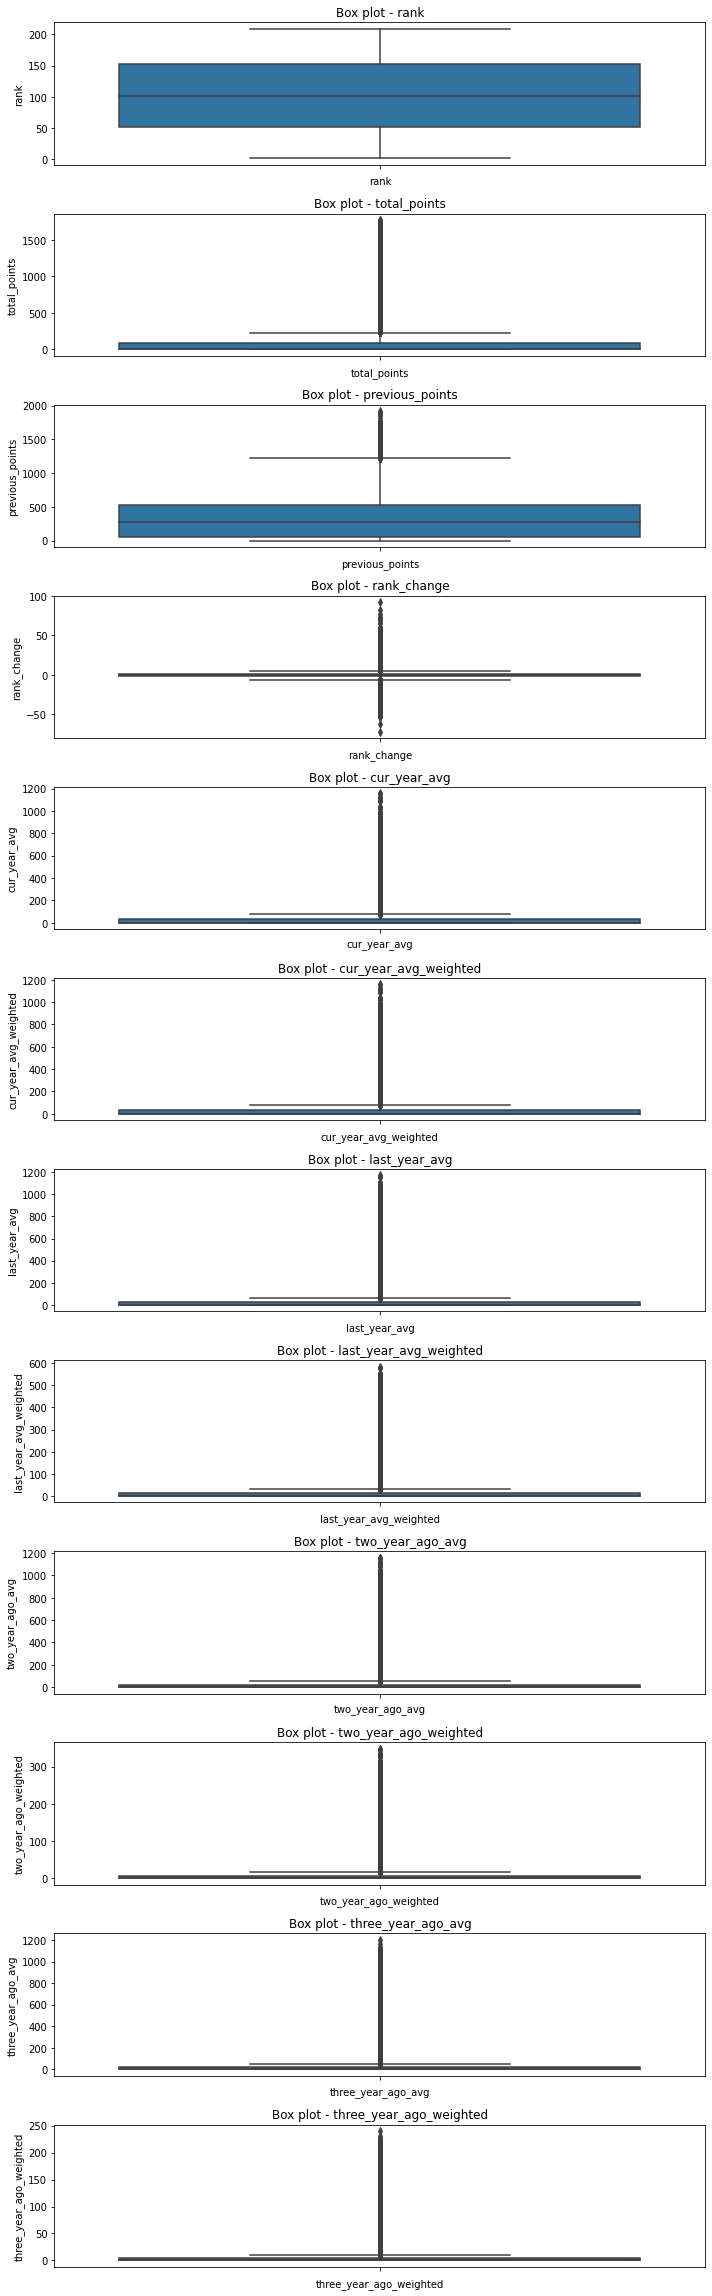

In [ ]:

# Fifa dataset
fig, ax = plt.subplots(len(col_names), figsize=(10,32))
for i, col_val in enumerate(col_names):
    sns.boxplot(y=fifa[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=10)
plt.tight_layout()
plt.show()

TypeError: ignored

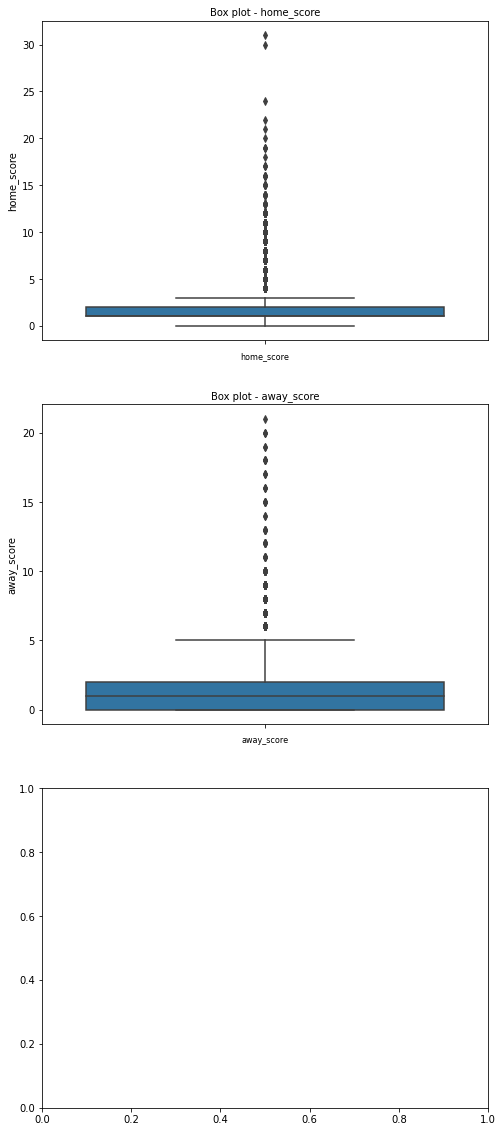

In [ ]:
# Boxplots for Results dataset
col_names = results.dtypes[results.dtypes != "object"].index 
fig, ax = plt.subplots(len(col_names), figsize=(8,20))
for i, col_val in enumerate(col_names):
    sns.boxplot(y=results[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.tight_layout()
plt.show()

# Checking for Anomalies

In [ ]:
# Check for duplicated rows
print('Fifa data duplicates : ', fifa.duplicated().any())
print('Results data duplicates : ', results.duplicated().any())

Fifa data duplicates :  True
Results data duplicates :  False


The fifa ranking dataset has duplicated entries, while the results dataset does not have any duplicates

In [ ]:
# Drop the duplicate rows from the dataset except for the first occurrence
fifa_data = fifa.drop_duplicates(keep = 'first')

In [ ]:
# Check for the number of rows that have been dropped
print('Fifa Data : ', fifa.shape[0] - fifa_data.shape[0] , 'rows have been dropped')

Fifa Data :  37 rows have been dropped


Checking for Missing data

In [ ]:
#fifa dataset
print('Missing Values in Fifa Dataset: \n\n', fifa.isnull().sum())

# results dataset
print('Missing Values in Results Dataset: \n\n', results.isnull().sum())

Missing Values in Fifa Dataset: 

 rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
Missing Values in Results Dataset: 

 date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


There are no missing data in both datasets

# Checking Cardinality

In [ ]:
# We will use a for loop to iterate through the columns 
# while checking for the number of unique values in each column.

# Number of unique values in the fifa ranking dataset
print('Cardinality of fifa dataset columns:\n')
for i in fifa_data.columns:
  print(f'{i:<23} : {fifa_data[i].nunique()}')
  
# Number of unique values of the columns in the match results dataset
print('\nCardinatity of the match results dataset columns:\n')
for j in results.columns:
  print(f'{j :<10} : {results[j].nunique()}')

Cardinality of fifa dataset columns:

rank                    : 209
country_full            : 216
country_abrv            : 216
total_points            : 11114
previous_points         : 1557
rank_change             : 121
cur_year_avg            : 7419
cur_year_avg_weighted   : 7419
last_year_avg           : 7473
last_year_avg_weighted  : 7001
two_year_ago_avg        : 7575
two_year_ago_weighted   : 6513
three_year_ago_avg      : 7628
three_year_ago_weighted : 5849
confederation           : 6
rank_date               : 286

Cardinatity of the match results dataset columns:

date       : 15115
home_team  : 309
away_team  : 306
home_score : 26
away_score : 22
tournament : 109
city       : 1960
country    : 266
neutral    : 2


# Appropriate Date type

In [ ]:
# Changing the date column data type to datetime#

fifa_data.rank_date = pd.to_datetime(fifa_data.rank_date)
results.date = pd.to_datetime(results.date)

# Confirming the datatypes
# Fifa dataset columns
print('Datatypes of Fifa columns:\n\n', fifa_data.dtypes)

# results data columns
print('\nDatatypes of results data columns: \n\n', results.dtypes)

Datatypes of Fifa columns:

 rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

Datatypes of results data columns: 

 date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral       

In [ ]:
# Create new columns and split the date colums into month and year.
#
# For the year columns
fifa_data['year'] = fifa_data.rank_date.dt.year
results['year'] = results.date.dt.year

# Now for the month columns
fifa_data['month'] = fifa_data.rank_date.dt.month
results['month'] = results.date.dt.month

In [ ]:
fifa_sub = fifa_data[fifa_data['year'] >= 1993]
results_sub = results[results['year'] >= 1993]

# Dealing with columns

Before merging the datasets, we need to make sure that the common columns have the same column names in both datasets.

In [ ]:
fifa_sub.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'year',
       'month'],
      dtype='object')

In [ ]:
results_sub.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month'],
      dtype='object')

In [ ]:
## Dropping irrelevant columns in fifa_rank dataset
fifa_sub = fifa_sub.drop(['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted',], 1)

In [ ]:
results_sub =results_sub.drop(['city', 'country' ], 1)

In [ ]:
fifa_sub.head()

,rank,country_full,confederation,rank_date,year,month
0,1,Germany,UEFA,1993-08-08,1993,8
1,2,Italy,UEFA,1993-08-08,1993,8
2,3,Switzerland,UEFA,1993-08-08,1993,8
3,4,Sweden,UEFA,1993-08-08,1993,8
4,5,Argentina,CONMEBOL,1993-08-08,1993,8


In [ ]:
results_sub.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month
17361,1993-01-01,Ghana,Mali,1,1,Friendly,True,1993,1
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,False,1993,1
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,False,1993,1
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,True,1993,1
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,False,1993,1


In [57]:
# taking a check of the years columns to see how the years are distributed
# 
results_sub['year'].value_counts()

2008    1091
2011    1081
2004    1064
2000    1026
2001    1018
2012    1012
2015    1003
2007     978
2013     966
2017     958
2003     936
2016     926
2009     897
1997     863
2014     859
2018     855
2010     854
2006     838
1996     829
2005     804
2002     752
1999     739
1993     733
1998     698
1995     641
1994     569
2019     488
Name: year, dtype: int64

From consideration of the two datasets, I settled on taking the year 2008 to be the basis for my study since it has most entries in the results dataset which has most of the variables used to predict the result of the games. This means getting a subset of data within 2008 only from (results_sub).

It also translates to having data from (fifa_sub) within year 2008 to be able to merge with the above subset of data

In [59]:
# Getting the fifa_ranking subset within year 2008
# 
fifa_sub = fifa_sub[fifa_sub['year']==2008]
fifa_sub.head()

,rank,country_full,confederation,rank_date,year,month
31686,1,Argentina,CONMEBOL,2008-01-16,2008,1
31687,2,Brazil,CONMEBOL,2008-01-16,2008,1
31688,3,Italy,UEFA,2008-01-16,2008,1
31689,4,Spain,UEFA,2008-01-16,2008,1
31690,5,Germany,UEFA,2008-01-16,2008,1


In [60]:
# Getting results subset within year 2008
# 
results_sub = results_sub[results_sub['year']==2008]
results_sub.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month
29849,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,2008,1
29850,2008-01-05,Egypt,Namibia,3,0,Friendly,False,2008,1
29851,2008-01-06,Tunisia,Zambia,1,2,Friendly,False,2008,1
29852,2008-01-08,Tunisia,Zambia,1,0,Friendly,False,2008,1
29853,2008-01-09,Nigeria,Sudan,2,0,Friendly,True,2008,1


# Data integration

# Merging the Datasets
Merge the two datasets to form our analysis dataset using an inner join as we want to keep only the rows exist on the columns common to both dataframes.


In [68]:
# The dataframes have been merged on both year and month
#
df = pd.merge(results_sub, fifa_sub, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])
df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,rank,country_full,confederation,rank_date
0,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,2008,1,1,Argentina,CONMEBOL,2008-01-16
1,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,2008,1,2,Brazil,CONMEBOL,2008-01-16
2,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,2008,1,3,Italy,UEFA,2008-01-16
3,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,2008,1,4,Spain,UEFA,2008-01-16
4,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,2008,1,5,Germany,UEFA,2008-01-16


In [69]:
# checking the number of records
# 
print('Number of records in fifa dataset: ' + str(df.shape))

Number of records in fifa dataset: (225837, 13)


In [70]:
# dropping unnecessary columns
# 
cols = ['country_full']
df.drop(cols, axis = 1, inplace = True)

# Feature Engineering

This involves creating new variables inorder to improve the model. I hence created an output variable which works through the results(Win,Draw or Loss)

In [71]:
df["Output"] = ["W" if i[0]>i[1] else "L" if i[0]<i[1] else "D" for i in zip(df.home_score,df.away_score)]
df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,rank,confederation,rank_date,Output
0,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,2008,1,1,CONMEBOL,2008-01-16,W
1,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,2008,1,2,CONMEBOL,2008-01-16,W
2,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,2008,1,3,UEFA,2008-01-16,W
3,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,2008,1,4,UEFA,2008-01-16,W
4,2008-01-02,Kuwait,Lebanon,3,2,Friendly,False,2008,1,5,UEFA,2008-01-16,W


# Exploratory Data Analysis

Text(0, 0.5, 'Count')

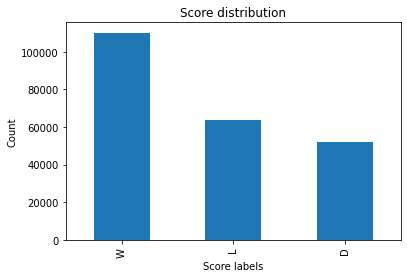

In [72]:
# plotting a bar chart to visualize the output column
df['Output'].value_counts().plot(kind='bar')
plt.title("Score distribution")
plt.xlabel("Score labels")
plt.ylabel("Count")

From the visualization above, there were more wins

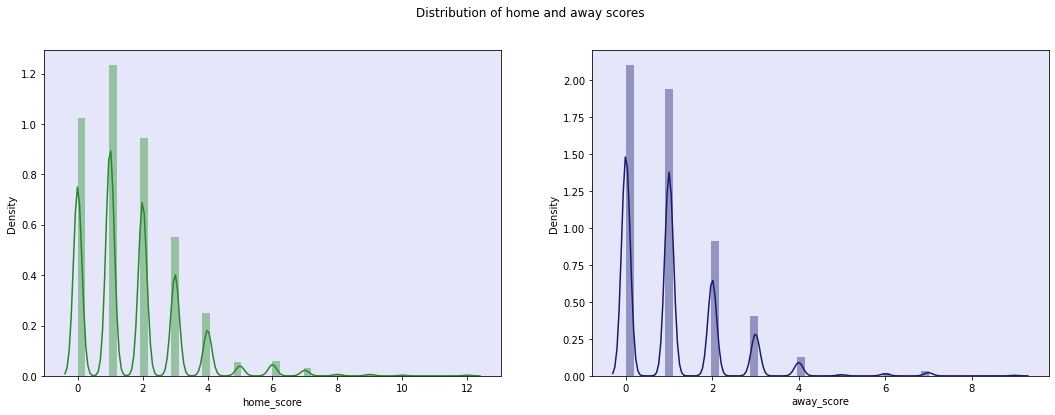

In [ ]:
# plot a histogram to visualize the distribution of home and away scores
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
plt.suptitle('Distribution of home and away scores')
for ax, data, column, color in zip(axes.flatten(),df, ['home_score', 'away_score'], ['forestgreen', 'midnightblue']):
  sns.distplot(df[column], ax = ax, hist = True, color = color)
  ax.set_facecolor('lavender')